<a href="https://colab.research.google.com/github/crrivero/FormalMethodsTasting/blob/main/For%20computer%20scientists/MaxBipartiteMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install z3-solver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 44.1 MB/s eta 0:00:00


Maximum Matching found!
Edges in matching: {('u3', 'v3'), ('u2', 'v2'), ('u1', 'v1')}


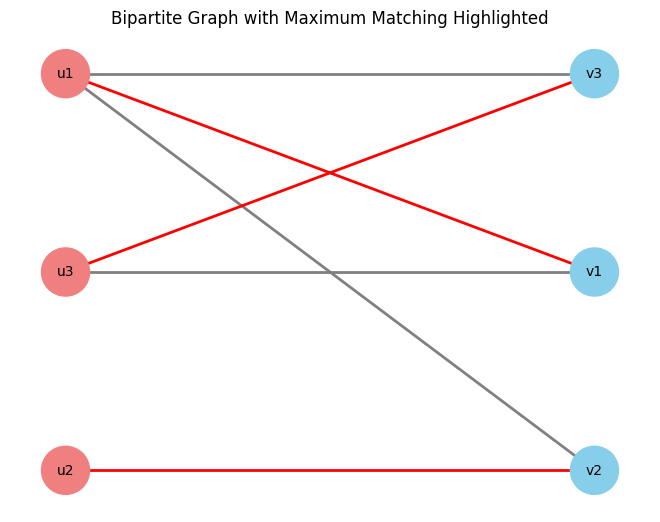

In [10]:
import networkx as nx
from z3 import *
import matplotlib.pyplot as plt

def visualize_matching(edges, matching):
    G = nx.Graph()

    U, V, edges_in_matching = set(), set(), set()
    for u_v in edges:
      uv_str = u_v.decl().name()
      u, v = uv_str.split('_')

      G.add_node(u, bipartite=0)
      G.add_node(v, bipartite=1)

      U.add(u)
      V.add(v)

      G.add_edge(u, v)

      if matching.evaluate(u_v):
        edges_in_matching.add((u, v))

    pos = {}
    pos.update((node, (1, i)) for i, node in enumerate(U))
    pos.update((node, (2, i)) for i, node in enumerate(V))

    # Set colors
    node_colors = ["lightcoral" if n in U else "skyblue" for n in G.nodes()]
    edge_colors = ["red" if (u, v) in edges_in_matching or (v, u) in edges_in_matching else "gray" for u, v in G.edges()]

    # Layout and draw
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors,
        node_size=1200, font_size=10, width=2)
    plt.title("Bipartite Graph with Maximum Matching Highlighted")
    plt.show()

# Define edge variables
u1_v1, u1_v2, u1_v3, u2_v2, u3_v1, u3_v3 = Bools('u1_v1 u1_v2 u1_v3 u2_v2 u3_v1 u3_v3')

opt = Optimize()

# --- At most one match per node in U ---
opt.add(AtMost(u1_v1, u1_v2, u1_v3, 1))
opt.add(AtMost(u2_v2, 1))
opt.add(AtMost(u3_v1, u3_v3, 1))

# --- At most one match per node in V ---
opt.add(AtMost(u1_v1, u3_v1, 1))
opt.add(AtMost(u1_v2, u2_v2, 1))
opt.add(AtMost(u1_v3, u3_v3, 1))

# --- Objective: Maximize the number of matched pairs ---
match_vars = [u1_v1, u1_v2, u1_v3, u2_v2, u3_v1, u3_v3]
opt.maximize(Sum([If(var, 1, 0) for var in match_vars]))

# --- Solve ---
if opt.check() == sat:
    m = opt.model()
    print("Maximum Matching found!")
    visualize_matching(match_vars, m)
else:
    print("No matching found.")